In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

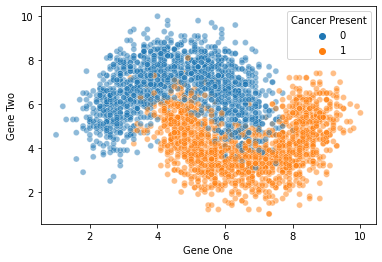

In [4]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.5)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()

In [9]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
y_pred = knn_model.predict(scaled_X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
accuracy_score(y_test,y_pred)

0.8922222222222222

In [16]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [17]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.90      0.89      0.90       470
          1       0.88      0.89      0.89       430

avg / total       0.89      0.89      0.89       900



In [19]:
accuracy_list = []

for i in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(scaled_X_train, y_train)
    
    pred = knn_model.predict(scaled_X_test)
    
    accuracy = accuracy_score(y_test, pred)
    
    accuracy_list.append(accuracy)

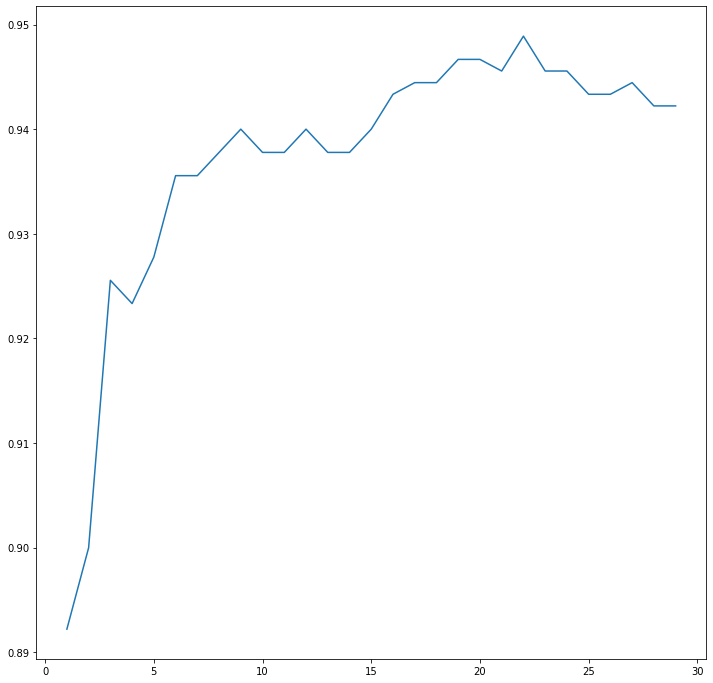

In [25]:
plt.figure(figsize=(12,12))
plt.plot(range(1,30),accuracy_list)
